In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.cluster import DBSCAN
# from geopy.distance import great_circle
# from shapely.geometry import MultiPoint
from haversine import haversine

from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import math
import dateutil
from datetime import date, datetime, time, timedelta
import timeit


In [5]:
uids = []
EMA = pd.read_csv("../../student_info.csv", engine="python")

In [6]:
uids = list(set(EMA['id']))

In [7]:
uids.sort()

In [8]:
uids

[20946596,
 22536401,
 22682373,
 22785668,
 22955826,
 24897713,
 25063234,
 25464368,
 27502754,
 27840617,
 27965866,
 28878128,
 29962358,
 30737266,
 32646509,
 34339234,
 38781420,
 39203876,
 39390847,
 40325607,
 40523189,
 41651454,
 41860680,
 41884980,
 42236646,
 43261317,
 43578831,
 45473021,
 46029500,
 47043065,
 48152807,
 49179064,
 50116575,
 50636732,
 50679144,
 51075903,
 51218616,
 51504685,
 52069902,
 52219914,
 52565188,
 53789312,
 53999376,
 54553998,
 54613079,
 55760914,
 57623951,
 57670750,
 58201289,
 63555770,
 63987688,
 64912412,
 65044529,
 66080208,
 66124688,
 67973507,
 71264204,
 75197570,
 75268901,
 75939877,
 76121285,
 76167811,
 76316612,
 76674752,
 76727067,
 76783139,
 86202124,
 87155919,
 87809201,
 88096582,
 89215319,
 89242282,
 89594101,
 89751274,
 90461852,
 92369558,
 93542520,
 93733764,
 93775784,
 94766746,
 94852564,
 95820905,
 95983626,
 97803125]

In [9]:
def kaist_cluster(row):
     
    lat = row[' latitude']
    log = row[' longitude']
    kaist = (36.3697053, 127.3580923)
    
    pos = (lat, log)

    distance = haversine(kaist, pos)

    if distance <=1:
        return 4

In [10]:
def check_time(timestamp):
    if(((timestamp.time())<time(12,0))&(timestamp.time()>time(5,59))):
        return "morning"
    elif(((timestamp.time())<time(18,0))&(timestamp.time()>time(11,59))):
        return "afternoon"
    elif(((timestamp.time())<time(23,59))&(timestamp.time()>time(17,59))):
        return "evening"
    
    


In [11]:
def nat_check(nat):
    return nat == np.datetime64('NaT')

In [12]:
def filter_row(row):
    timestamp = row['timestamp']
    time_next = row['time_next']
    
    uid = row['uid']
    uid_next = row['uid_next']
    
    if uid == uid_next:
        time_diff = time_next - timestamp

        if nat_check(time_diff):
            time_diff_min = 0
        else:
            time_diff_min = int(time_diff.total_seconds())

    return time_diff_min


In [62]:
total_df = pd.DataFrame()

count = 0
for uid in uids:
    print(uid)
    loc = pd.read_csv("../../"+str(uid)+"/GPS_"+str(uid)+".csv")
    
    loc['uid'] = uid
    loc['timestamp'] = loc['timestamp'].astype(str)
    loc['timestamp'] = loc['timestamp'].str.replace(" ", "")
    loc['timestamp'] = loc['timestamp'].str.replace(".", "")
    loc['timestamp'] = loc['timestamp'].str.replace("_", "")

    loc['timestamp'] = pd.to_datetime(loc['timestamp'] , format="%H:%M:%S:%f")
    loc = loc[(loc['timestamp']>=date(2017,9,10)) & (loc['timestamp']<=date(2017,12,18)) ]
    
    loc['time_next'] = loc['timestamp'].shift(-1)
    loc['uid_next'] = loc['uid'].shift(-1)
    loc = loc.iloc[:-1]
    
    loc['cluster_id'] = loc.apply(kaist_cluster, axis=1)
    loc['time_window'] = loc['timestamp'].map(lambda x: check_time(x)); 
    loc['time_diff'] = loc.apply(filter_row, axis=1)

    if count == 0:
        total_df = loc
    else:
        total_df = pd.concat([total_df, loc])
        
    count+=1
    

20946596


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  from ipykernel import kernelapp as app


22536401
22682373
22785668
22955826
24897713
25063234
25464368
27502754
27840617
27965866
28878128
29962358
30737266
32646509
34339234
38781420
39203876
39390847
40325607
40523189
41651454
41860680
41884980
42236646
43261317
43578831
45473021
46029500
47043065
48152807
49179064
50116575
50636732
50679144
51075903
51218616
51504685
52069902
52219914
52565188
53789312
53999376
54553998
54613079
55760914
57623951
57670750
58201289
63555770
63987688
64912412
65044529
66080208
66124688
67973507
71264204
75197570
75268901
75939877
76121285
76167811
76316612
76674752
76727067
76783139
86202124
87155919
87809201
88096582
89215319
89242282
89594101
89751274
90461852
92369558
93542520
93733764
93775784
94766746
94852564
95820905
95983626
97803125


In [63]:
total_df.to_csv("total_loc.csv")

In [64]:
tmp = total_df[total_df['uid'] == 97803125]

In [65]:
tmp.tail()

,timestamp,latitude,longitude,uid,time_next,uid_next,cluster_id,time_window,time_diff
449166,2017-12-17 23:49:04,35.214012,128.711126,97803125,2017-12-17 23:51:07,97803125.0,NaN,evening,123
449167,2017-12-17 23:51:07,35.214012,128.711126,97803125,2017-12-17 23:53:08,97803125.0,NaN,evening,121
449168,2017-12-17 23:53:08,35.214012,128.711126,97803125,2017-12-17 23:54:20,97803125.0,NaN,evening,72
449169,2017-12-17 23:54:20,35.214012,128.711127,97803125,2017-12-17 23:58:14,97803125.0,NaN,evening,234
449170,2017-12-17 23:58:14,35.214012,128.711127,97803125,2017-12-17 23:59:20,97803125.0,NaN,evening,66


In [66]:

def check_n_cluster(loc_df, num):
    locs = loc_df[['timestamp', ' latitude',' longitude', 'uid']]
    points = locs[[' latitude',' longitude']].values
    gmm = GaussianMixture(n_components=num).fit(points)
    labels = gmm.predict(points)
    locs['cluster_id'] = labels
    
    sns.lmplot(' latitude', ' longitude', data = locs, fit_reg = False, scatter_kws={'s':100}, hue='cluster_id')
    plt.title('GMM clustering - N:'+ str(num))
    
    #36.3697053,127.3580923

    cluster_result = []


    return locs

In [67]:
total_df = total_df[total_df['time_diff']>=60]
total_df_outside = total_df[total_df['cluster_id']!=4]
total_df_inside = total_df[total_df['cluster_id']==4]




In [68]:
total_df_outside.shape

(535338, 9)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


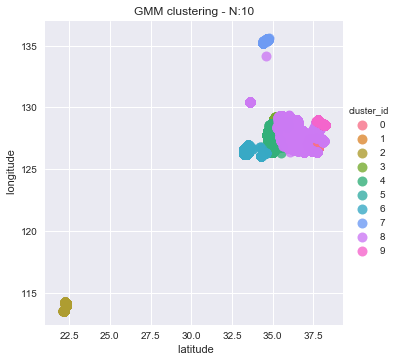

In [69]:
outside_clustered = check_n_cluster(total_df_outside, 10)

In [79]:
outside_clustered[outside_clustered['long']==8]

,timestamp,latitude,longitude,uid,cluster_id
11166,2017-09-10 00:00:28,36.863267,128.088427,20946596,8
11167,2017-09-10 00:02:23,36.863267,128.088427,20946596,8
11168,2017-09-10 00:04:23,36.863267,128.088427,20946596,8
11169,2017-09-10 00:06:24,36.863267,128.088427,20946596,8
11184,2017-09-10 00:11:42,36.863267,128.088427,20946596,8
11185,2017-09-10 00:12:50,36.863267,128.088427,20946596,8
11204,2017-09-10 00:16:36,36.863101,128.087997,20946596,8
11205,2017-09-10 00:18:53,36.863101,128.087997,20946596,8
11215,2017-09-10 00:23:41,36.863267,128.088427,20946596,8
11217,2017-09-10 00:26:16,36.863072,128.088281,20946596,8


In [81]:
outside_clustered_2 = outside_clustered[outside_clustered[' longitude'] <130]

In [83]:
outside_clustered_2 = outside_clustered_2[outside_clustered_2['cluster_id']!=2]

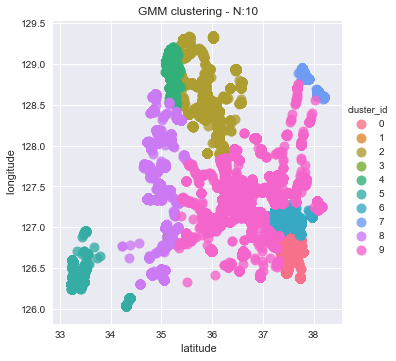

In [84]:
outside_clustered_3 = check_n_cluster(outside_clustered_2, 10)

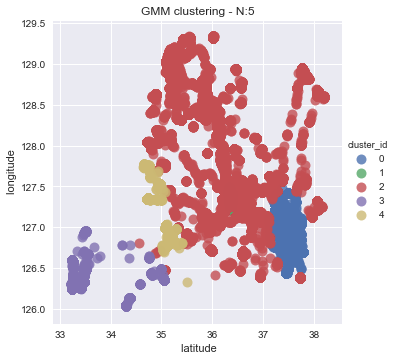

In [85]:
outside_clustered_4 = check_n_cluster(outside_clustered_2, 5)

In [88]:
set(outside_clustered_3[outside_clustered_3['uid']==41860680]['cluster_id'])

{0, 1, 6, 9}

In [89]:
total_df_inside['cluster_id'] =10


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
set(total_df_inside['uid'])

{20946596,
 22536401,
 22682373,
 22785668,
 22955826,
 24897713,
 25063234,
 25464368,
 27502754,
 27840617,
 27965866,
 28878128,
 29962358,
 30737266,
 32646509,
 34339234,
 38781420,
 39203876,
 39390847,
 40325607,
 40523189,
 41651454,
 41860680,
 41884980,
 42236646,
 43261317,
 43578831,
 45473021,
 46029500,
 47043065,
 48152807,
 49179064,
 50116575,
 50636732,
 50679144,
 51075903,
 51218616,
 51504685,
 52069902,
 52219914,
 52565188,
 53789312,
 53999376,
 54553998,
 54613079,
 55760914,
 57623951,
 57670750,
 58201289,
 63555770,
 63987688,
 64912412,
 65044529,
 66080208,
 66124688,
 67973507,
 71264204,
 75197570,
 75268901,
 75939877,
 76121285,
 76167811,
 76316612,
 76674752,
 76727067,
 76783139,
 86202124,
 87155919,
 87809201,
 88096582,
 89215319,
 89242282,
 89594101,
 89751274,
 90461852,
 92369558,
 93542520,
 93733764,
 93775784,
 94766746,
 94852564,
 95820905,
 95983626,
 97803125}

In [91]:
common_loc = pd.concat([total_df_inside,outside_clustered_3 ])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [92]:
common_loc = common_loc.sort_values(["uid", 'timestamp'], ascending=[True,True])

In [94]:
common_loc.head(50)
common_loc = common_loc[[' latitude', ' longitude', 'cluster_id', 'timestamp', 'uid']]

In [95]:
common_loc.head()

,latitude,longitude,cluster_id,timestamp,uid
11166,36.863267,128.088427,9,2017-09-10 00:00:28,20946596
11167,36.863267,128.088427,9,2017-09-10 00:02:23,20946596
11168,36.863267,128.088427,9,2017-09-10 00:04:23,20946596
11169,36.863267,128.088427,9,2017-09-10 00:06:24,20946596
11184,36.863267,128.088427,9,2017-09-10 00:11:42,20946596


In [96]:
common_loc['timestamp'] = common_loc['timestamp'].astype(str)


common_loc['timestamp'] = pd.to_datetime(common_loc['timestamp'] , format="%Y-%m-%d %H:%M:%S")


In [97]:
common_loc['time_next'] = common_loc['timestamp'].shift(-1)
common_loc['uid_next'] = common_loc['uid'].shift(-1)

In [98]:
set(common_loc['cluster_id'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [99]:
common_loc.iloc[:-1,:]
common_loc.to_csv("common_loc_feature.csv")

In [100]:
def mapping_minutes_loc(df):
        gmm_parse = pd.DataFrame()
        mapping_start = timeit.default_timer()

        for index,row in df.iterrows():
            uid = row['uid']
            uid_next = row['uid_next']
            
            df_stime = row['timestamp']
            df_etime = row['time_next']

            lat = row[' latitude']
            long = row[' longitude']
            cluster = row['cluster_id']
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
            if uid == uid_next: 
                while df_stime < df_etime:
                    df_stime = df_stime + timedelta(minutes=1)
                    gmm_parse.loc[(df_stime), ("uid")] = uid
                    gmm_parse.loc[(df_stime), (" latitude")] =  lat
                    gmm_parse.loc[(df_stime), (" longitude")] =  long
                    gmm_parse.loc[(df_stime), ("timestamp")] =  df_stime
                    gmm_parse.loc[(df_stime), ("cluster_id")] =  cluster
        mapping_stop = timeit.default_timer()
        print("**Total Time**", mapping_stop - mapping_start)

        return gmm_parse

In [101]:
test_users = [20946596, 22536401,22682373, 22785668, 30737266, 32646509, 34339234]

In [108]:
all_users = []
EMA = pd.read_csv("../../student_info.csv", engine="python")

all_users = list(set(EMA['id']))
all_users = list(set(all_users) - set(test_users)) #순서 보존이 안됨
all_users.sort()

In [102]:
common_loc = common_loc.iloc[:-1,:]


In [103]:
common_loc = common_loc.set_index("timestamp")

In [104]:
common_loc['timestamp']= common_loc.index

In [105]:
common_loc.head()

,latitude,longitude,cluster_id,uid,time_next,uid_next,timestamp
timestamp,,,,,,,
2017-09-10 00:00:28,36.863267,128.088427,9,20946596,2017-09-10 00:02:23,20946596.0,2017-09-10 00:00:28
2017-09-10 00:02:23,36.863267,128.088427,9,20946596,2017-09-10 00:04:23,20946596.0,2017-09-10 00:02:23
2017-09-10 00:04:23,36.863267,128.088427,9,20946596,2017-09-10 00:06:24,20946596.0,2017-09-10 00:04:23
2017-09-10 00:06:24,36.863267,128.088427,9,20946596,2017-09-10 00:11:42,20946596.0,2017-09-10 00:06:24
2017-09-10 00:11:42,36.863267,128.088427,9,20946596,2017-09-10 00:12:50,20946596.0,2017-09-10 00:11:42


In [109]:
common_loc[common_loc['uid'] == 20946596]

,latitude,longitude,cluster_id,uid,time_next,uid_next,timestamp
timestamp,,,,,,,
2017-09-10 00:00:28,36.863267,128.088427,9,20946596,2017-09-10 00:02:23,20946596.0,2017-09-10 00:00:28
2017-09-10 00:02:23,36.863267,128.088427,9,20946596,2017-09-10 00:04:23,20946596.0,2017-09-10 00:02:23
2017-09-10 00:04:23,36.863267,128.088427,9,20946596,2017-09-10 00:06:24,20946596.0,2017-09-10 00:04:23
2017-09-10 00:06:24,36.863267,128.088427,9,20946596,2017-09-10 00:11:42,20946596.0,2017-09-10 00:06:24
2017-09-10 00:11:42,36.863267,128.088427,9,20946596,2017-09-10 00:12:50,20946596.0,2017-09-10 00:11:42
2017-09-10 00:12:50,36.863267,128.088427,9,20946596,2017-09-10 00:16:36,20946596.0,2017-09-10 00:12:50
2017-09-10 00:16:36,36.863101,128.087997,9,20946596,2017-09-10 00:18:53,20946596.0,2017-09-10 00:16:36
2017-09-10 00:18:53,36.863101,128.087997,9,20946596,2017-09-10 00:23:41,20946596.0,2017-09-10 00:18:53
2017-09-10 00:23:41,36.863267,128.088427,9,20946596,2017-09-10 00:26:16,20946596.0,2017-09-10 00:23:41


In [107]:
for i in test_users:
    print(i)
    user_df =  common_loc[common_loc['uid'] == i]
    common_filled = mapping_minutes_loc(user_df)
    
    common_filled.to_csv(str(i)+"_filled.csv")

20946596
**Total Time** 2264.449967804714
22536401
**Total Time** 2181.18610107126
22682373
**Total Time** 1562.0859762863656
22785668
**Total Time** 2102.4819383394934
30737266
**Total Time** 1924.8068838719191
32646509
**Total Time** 1977.912039414361
34339234
**Total Time** 2129.8997916846274


In [112]:
for user_id  in all_users:
   
    print(user_id)
  
    user_df =  common_loc[common_loc['uid'] == user_id]
    common_filled = mapping_minutes_loc(user_df)
    
    common_filled.to_csv(str(user_id)+"_filled.csv")

22955826
**Total Time** 1964.8453920177708
24897713
**Total Time** 2609.734674788575
25063234
**Total Time** 1663.516551501787
25464368
**Total Time** 2021.0063795642345
27502754
**Total Time** 2068.4346823303204
27840617
**Total Time** 2106.380199433508
27965866
**Total Time** 2252.703481567849
28878128
**Total Time** 2081.872323982825
29962358
**Total Time** 2071.1699192969536
38781420
**Total Time** 1918.3317748992122
39203876
**Total Time** 2246.0822534716863
39390847
**Total Time** 2003.9726074155187
40325607
**Total Time** 2221.0422384722624
40523189
**Total Time** 2154.1985693454626
41651454
**Total Time** 2243.898401413171
41860680
**Total Time** 2287.3421540103445
41884980
**Total Time** 1679.5774049487663
42236646
**Total Time** 2011.1491394409095
43261317
**Total Time** 2581.9578579783556
43578831
**Total Time** 1689.456733772473
45473021
**Total Time** 1587.6723538494552
46029500
**Total Time** 2127.4708597357967
47043065
**Total Time** 2088.608496009896
48152807
**Total Ti